to-do:
- add line on plot 1 showing the width of the range that we consider for the quadrature sum
- put sum_over_root_b into a script
- summary plot: test different methods in a bunch of different signal regions

In [3]:
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist, new, axis
from analyzer.plotting import PlotObject, drawAs1DHist

In [4]:
def L2_norm(values):
    sum_of_squares = np.sum(np.power(values, 2))
    return np.sqrt(sum_of_squares)

In [5]:
def s_over_root_b(hists, background_name, signal_name, xvar, true_mass, plot=True):
    signal_hist = hists[xvar][signal_name, ...]
    background_hist = hists[xvar][background_name, ...]
    signal_data = signal_hist.to_numpy()[0]
    background_data, edges = background_hist.to_numpy()
    bin_centers = (edges[:-1] + edges[1:])/2
    sqrt_b = np.sqrt(background_data)
    result = np.nan_to_num(signal_data/sqrt_b)

    if plot:
        background_style = s.getCollection(background_name).style
        signal_style = s.getSet(signal_name).style
        background_obj = PlotObject.fromHist(hists[xvar][background_name,...], style=background_style)
        signal_obj = PlotObject.fromHist(hists[xvar][signal_name,...], style=signal_style)
        fig, ax = plt.subplots(1, 2)
        fig.set_figwidth(12)
        ax[0].set_xlabel(xvar)
        ax[0].set_ylabel("number of events")
        ax[0].set_yscale("log")
        ax[1].set_xlabel(xvar)
        ax[1].set_ylabel("$S/\sqrt{B}$")
        # ax.set_xlabel(key)
        # ax.set_ylabel("$S/\sqrt{B}$")
        # ax.set_title("Scatter plot of S/sqrt(B)")
        drawAs1DHist(ax[0], background_obj)
        drawAs1DHist(ax[0], signal_obj)
        ax[1].scatter(bin_centers, result)

    print(abs(np.add(bin_centers, -true_mass)))
    return L2_norm(result[abs(np.add(bin_centers, -true_mass)) < 100])
    return L2_norm(result)

In [7]:
data_1500_900 = pickle.load(open("outputs.pkl", "rb"))

In [8]:
s = SampleManager()

In [9]:
s.loadSamplesFromDirectory("datasets/")

In [10]:
s

SampleManager(sets={'TTToHadronic2018': TTToHadronic2018, 'DataSingleMuon2016': DataSingleMuon2016, 'Skim_QCDInclusive2018_HT300to500': Skim_QCDInclusive2018_HT300to500, 'Skim_QCDInclusive2018_HT500to700': Skim_QCDInclusive2018_HT500to700, 'Skim_QCDInclusive2018_HT700to1000': Skim_QCDInclusive2018_HT700to1000, 'Skim_QCDInclusive2018_HT1000to1500': Skim_QCDInclusive2018_HT1000to1500, 'Skim_QCDInclusive2018_HT1500to2000': Skim_QCDInclusive2018_HT1500to2000, 'Skim_QCDInclusive2018_HT2000toInf': Skim_QCDInclusive2018_HT2000toInf, 'Skim_WJetsToQQ2018_HT-200To400': Skim_WJetsToQQ2018_HT-200To400, 'Skim_WJetsToQQ2018_HT-400To600': Skim_WJetsToQQ2018_HT-400To600, 'Skim_WJetsToQQ2018_HT-600To800': Skim_WJetsToQQ2018_HT-600To800, 'Skim_WJetsToQQ2018_HT-800ToInf': Skim_WJetsToQQ2018_HT-800ToInf, 'Skim_ZJetsToQQ2018_HT-200To400': Skim_ZJetsToQQ2018_HT-200To400, 'Skim_ZJetsToQQ2018_HT-400To600': Skim_ZJetsToQQ2018_HT-400To600, 'Skim_ZJetsToQQ2018_HT-600To800': Skim_ZJetsToQQ2018_HT-600To800, 'Skim_

In [12]:
a = AnalysisResult.fromFile("outputs.pkl")

m13_pt could be a NN parameter lol i'm never gonna look at this again

In [13]:
hists = a.getMergedHistograms(s)

In [15]:
hists

{'h_njet': Hist(Regular(10, 0, 10, name='nj', label='$n_{j}$'), storage=Weight()) # Sum: WeightedSum(value=1.49776e+06, variance=8.21396e+06),
 'm14_pt': Hist(Regular(100, 0, 1500, name='$p_T ( \\sum_{n=1}^{4} jet_{n})$ '), storage=Weight()) # Sum: WeightedSum(value=1.49775e+06, variance=8.21395e+06) (WeightedSum(value=1.49776e+06, variance=8.21396e+06) with flow),
 'm14_eta': Hist(Regular(20, -5, 5, name='$\\eta ( \\sum_{n=1}^{4} ) jet_{n}$'), storage=Weight()) # Sum: WeightedSum(value=1.44195e+06, variance=7.91662e+06) (WeightedSum(value=1.49776e+06, variance=8.21396e+06) with flow),
 'm14_m': Hist(Regular(60, 0, 3000, name='$m_{4}$'), storage=Weight()) # Sum: WeightedSum(value=1.46774e+06, variance=8.14431e+06) (WeightedSum(value=1.49776e+06, variance=8.21396e+06) with flow),
 'm13_pt': Hist(Regular(100, 0, 1500, name='$p_T ( \\sum_{n=1}^{3} jet_{n})$ '), storage=Weight()) # Sum: WeightedSum(value=1.49775e+06, variance=8.21395e+06) (WeightedSum(value=1.49776e+06, variance=8.21396e+0

In [19]:
for thing in hists["m13_m"].axes:
    print("hi")

hi


## mchi = 900

[ 875.  825.  775.  725.  675.  625.  575.  525.  475.  425.  375.  325.
  275.  225.  175.  125.   75.   25.   25.   75.  125.  175.  225.  275.
  325.  375.  425.  475.  525.  575.  625.  675.  725.  775.  825.  875.
  925.  975. 1025. 1075. 1125. 1175. 1225. 1275. 1325. 1375. 1425. 1475.
 1525. 1575. 1625. 1675. 1725. 1775. 1825. 1875. 1925. 1975. 2025. 2075.]


/tmp/ipykernel_891103/726296228.py:8: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


0.32482988727802453

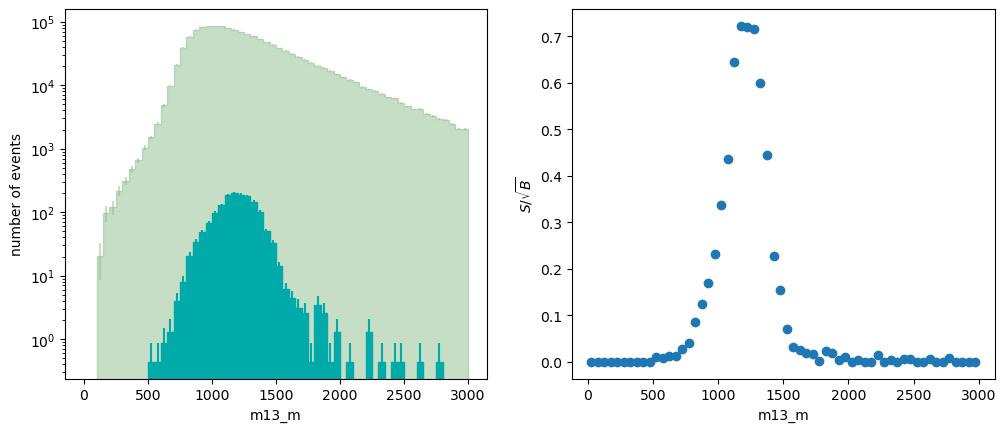

In [40]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_900", "m13_m", 900)

[ 875.  825.  775.  725.  675.  625.  575.  525.  475.  425.  375.  325.
  275.  225.  175.  125.   75.   25.   25.   75.  125.  175.  225.  275.
  325.  375.  425.  475.  525.  575.  625.  675.  725.  775.  825.  875.
  925.  975. 1025. 1075. 1125. 1175. 1225. 1275. 1325. 1375. 1425. 1475.
 1525. 1575. 1625. 1675. 1725. 1775. 1825. 1875. 1925. 1975. 2025. 2075.]


/tmp/ipykernel_891103/726296228.py:8: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


1.53961165480802

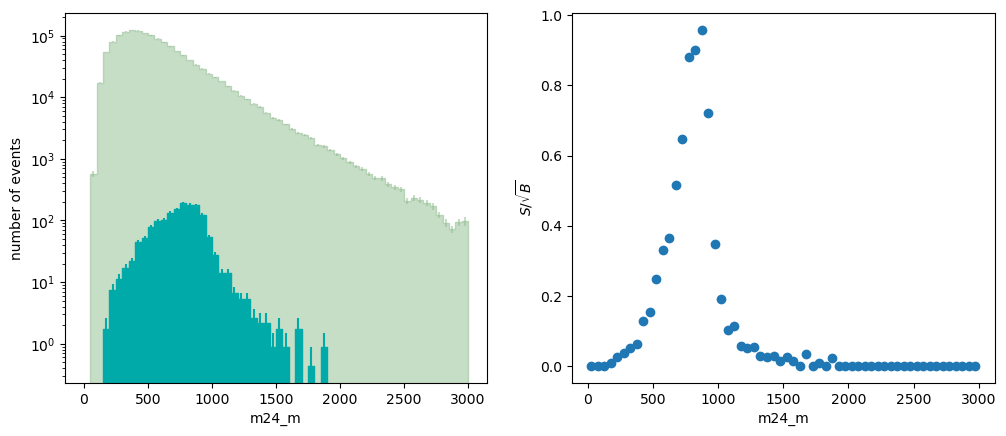

In [41]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_900", "m24_m", 900)

[ 875.  825.  775.  725.  675.  625.  575.  525.  475.  425.  375.  325.
  275.  225.  175.  125.   75.   25.   25.   75.  125.  175.  225.  275.
  325.  375.  425.  475.  525.  575.  625.  675.  725.  775.  825.  875.
  925.  975. 1025. 1075. 1125. 1175. 1225. 1275. 1325. 1375. 1425. 1475.
 1525. 1575. 1625. 1675. 1725. 1775. 1825. 1875. 1925. 1975. 2025. 2075.]


/tmp/ipykernel_891103/726296228.py:8: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


1.6645491163079857

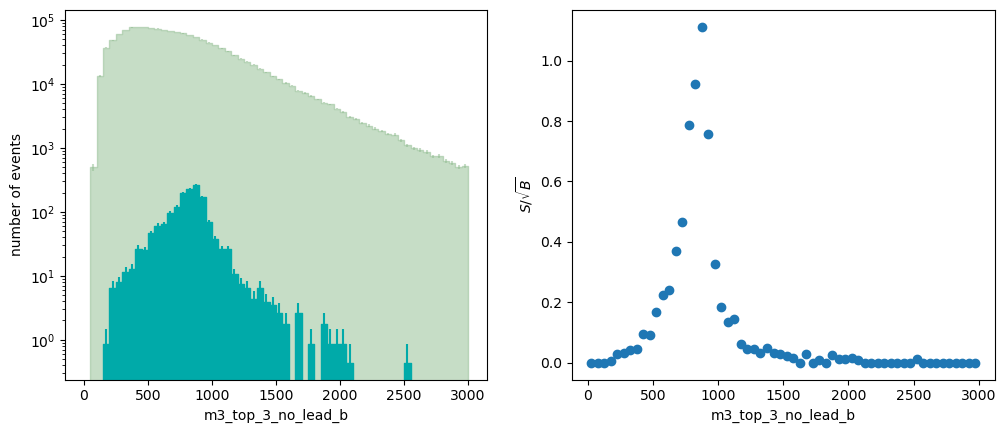

In [42]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_900", "m3_top_3_no_lead_b", 900)

In [10]:
hists["m13_m"]["signal_312_1500_900",...]

Hist(Regular(60, 0, 3000, name='$m_{3}$'), storage=Weight()) # Sum: WeightedSum(value=1534, variance=669.653)

In [24]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
signal_style = s.getSet("signal_312_1500_900").style

In [25]:
background_obj = PlotObject.fromHist(hists["m13_m"]["Skim_QCDInclusive2018",...], style=background_style)
signal_obj = PlotObject.fromHist(hists["m13_m"]["signal_312_1500_900",...], style=signal_style)

<Axes: >

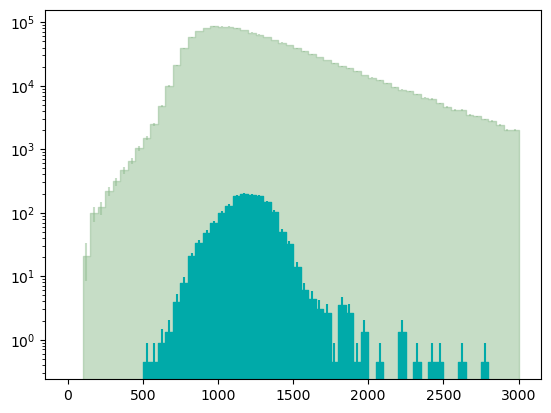

In [28]:
fig, ax = plt.subplots()
ax.set_yscale('log')
drawAs1DHist(ax, background_obj)
drawAs1DHist(ax, signal_obj)

## mchi = 600

In [13]:
data_1500_600 = pickle.load(open("output_1500_600.pkl", "rb"))

In [14]:
s = SampleManager()

In [15]:
s.loadSamplesFromDirectory("datasets/")

In [16]:
s

SampleManager(sets={'TTToHadronic2018': TTToHadronic2018, 'DataSingleMuon2016': DataSingleMuon2016, 'Skim_QCDInclusive2018_HT300to500': Skim_QCDInclusive2018_HT300to500, 'Skim_QCDInclusive2018_HT500to700': Skim_QCDInclusive2018_HT500to700, 'Skim_QCDInclusive2018_HT700to1000': Skim_QCDInclusive2018_HT700to1000, 'Skim_QCDInclusive2018_HT1000to1500': Skim_QCDInclusive2018_HT1000to1500, 'Skim_QCDInclusive2018_HT1500to2000': Skim_QCDInclusive2018_HT1500to2000, 'Skim_QCDInclusive2018_HT2000toInf': Skim_QCDInclusive2018_HT2000toInf, 'Skim_WJetsToQQ2018_HT-200To400': Skim_WJetsToQQ2018_HT-200To400, 'Skim_WJetsToQQ2018_HT-400To600': Skim_WJetsToQQ2018_HT-400To600, 'Skim_WJetsToQQ2018_HT-600To800': Skim_WJetsToQQ2018_HT-600To800, 'Skim_WJetsToQQ2018_HT-800ToInf': Skim_WJetsToQQ2018_HT-800ToInf, 'Skim_ZJetsToQQ2018_HT-200To400': Skim_ZJetsToQQ2018_HT-200To400, 'Skim_ZJetsToQQ2018_HT-400To600': Skim_ZJetsToQQ2018_HT-400To600, 'Skim_ZJetsToQQ2018_HT-600To800': Skim_ZJetsToQQ2018_HT-600To800, 'Skim_

In [17]:
a = AnalysisResult.fromFile("output_1500_600.pkl")

m13_pt could be a NN parameter lol i'm never gonna look at this again

In [18]:
hists = a.getMergedHistograms(s)

/tmp/ipykernel_891103/2515261387.py:7: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


1.9119319833161905

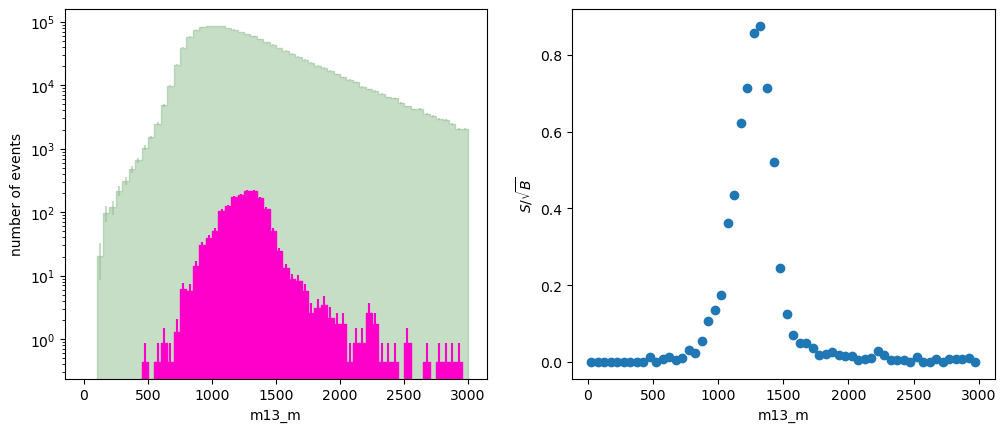

In [21]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_600", "m13_m")

/tmp/ipykernel_891103/2515261387.py:7: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


1.8516350164469533

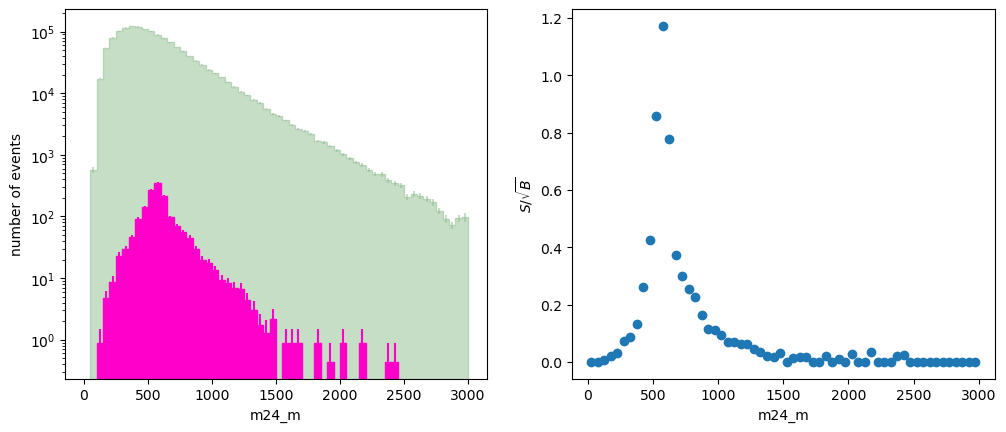

In [19]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_600", "m24_m")

/tmp/ipykernel_891103/2515261387.py:7: RuntimeWarning: invalid value encountered in divide
  result = np.nan_to_num(signal_data/sqrt_b)


2.031077960639001

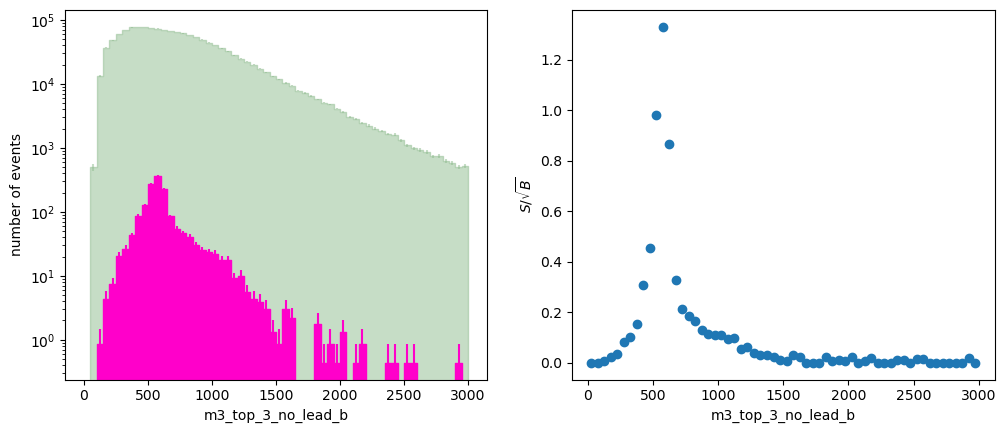

In [20]:
s_over_root_b("Skim_QCDInclusive2018", "signal_312_1500_600", "m3_top_3_no_lead_b")